# Systems of Nonlinear Equations

### SciPy, Sympy, Numpy, Matplotlib

In [3]:
from scipy import linalg as la
from scipy import optimize

In [4]:
import sympy
sympy.init_printing()

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

from mpl_toolkits.mplot3d.axes3d import Axes3D

> Not all methods that we previously discussed for univariate equation solving can
be generalized to the multivariate case. For example, the bisection method cannot be
directly generalized to a multivariate equation system. On the other hand, Newton’s
method can be used for multivariate problems, and in this case its iteration formula
is

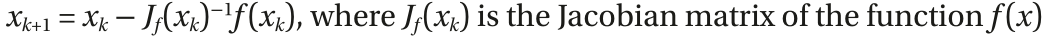

> with elements

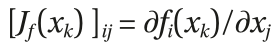

> Instead of inverting the Jacobian matrix, it is sufficient to
solve the linear equation system

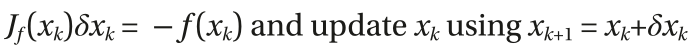

> Like
the secant variants of the Newton method for univariate equation systems, there are also
variants of the multivariate method that avoid computing the Jacobian by estimating it
from previous function evaluations

> Broyden’s method is a popular example of this type
of secant updating method for multivariate equation systems. In the SciPy optimize module, broyden1 and broyden2 provide two implementations of Broyden’s method
using different approximations of the Jacobian, and the function optimize.fsolve
provides an implementation of a Newton-like method, where optionally the Jacobian
can be specified, if available. The functions all have a similar function signature: The first
argument is a Python function that represents the equation to be solved, and it should
take a NumPy array as the first argument and return an array of the same shape. The
second argument is an initial guess for the solution, as a NumPy array. The optimize.
fsolve function also takes an optional keyword argument fprime, which can be used
to provide a function that returns the Jacobian of the function f (x). In addition, all these
functions take numerous optional keyword arguments for tuning their behavior (see the
docstrings for details)

> For example, consider the following system of two multivariate and nonlinear
equations
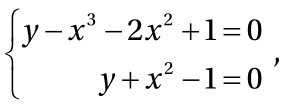

In [11]:
def f(x):
    return [x[1] - x[0]**3 - 2 * x[0]**2 + 1, x[1] + x[0]**2 - 1]

optimize.fsolve(f, [1, 1])

array([0.73205081, 0.46410162])

In [12]:
x, y = sympy.symbols("x, y")
f_mat = sympy.Matrix([y - x**3 -2*x**2 + 1, y + x**2 - 1])
f_mat_jacobian = f_mat.jacobian(sympy.Matrix([x, y]))
f_mat_jacobian

⎡     2         ⎤
⎢- 3⋅x  - 4⋅x  1⎥
⎢               ⎥
⎣    2⋅x       1⎦

In [22]:
def f_jacobian(x):
    return [[-3*x[0]**2-4*x[0], 1], [2*x[0], 1]]

### fprime=f_jacobian <- second derivative matrix

In [24]:
optimize.fsolve(f, [1, 1], fprime=f_jacobian)

array([0.73205081, 0.46410162])